In [1]:
import os

os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

In [2]:
from monty.serialization import loadfn, dumpfn

In [13]:
MODEL = "orb"

In [4]:
supercell_size = 10

In [14]:
complete_energies = loadfn(f'../data/{MODEL}_corrected_doped_defect_energies_{supercell_size}A.json')

Defect formation energy = energy of defect supercell *min energy site* + Al atoms chem potential - non defect supercell - Cr atom chem potential

In [15]:
for key in complete_energies.keys():
    if key != 'mp-755882':
        complete_energies[key]['defect formation energy'] = {}
        defect_supercell_e = complete_energies[key]['minimum energy site']['energy']
        supercell_e = complete_energies[key]['supercell']['energy'] # pristine supercell
        formation_energy = {}
        for key1 in complete_energies[key]['competing phases']['chemical potentials']['limits'].keys():
            defect_energy = defect_supercell_e + complete_energies[key]['competing phases']['chemical potentials']['limits'][key1]['Al'] - supercell_e - complete_energies[key]['competing phases']['chemical potentials']['limits'][key1]['Cr']
            formation_energy[key1] = defect_energy
        complete_energies[key]['defect formation energy'] = formation_energy

In [8]:
dumpfn(complete_energies, f'../data/{MODEL}_corrected_calculated_defect_formation_energies_{supercell_size}A.json')

In [9]:
complete_energies = loadfn(f'../data/{MODEL}_corrected_calculated_defect_formation_energies_{supercell_size}A.json')

In [16]:
#plot of min that includes negatives
mfe = []
compounds = []
for key, val in complete_energies.items():
    if key != 'mp-755882':
        compounds.append(complete_energies[key]['formula'])
        min_key = min(val['defect formation energy'], key=val['defect formation energy'].get)
        min_value = complete_energies[key]['defect formation energy'][min_key]
        mfe.append(val['defect formation energy'][min_key])

In [17]:
import numpy as np
import matplotlib.pyplot as plt

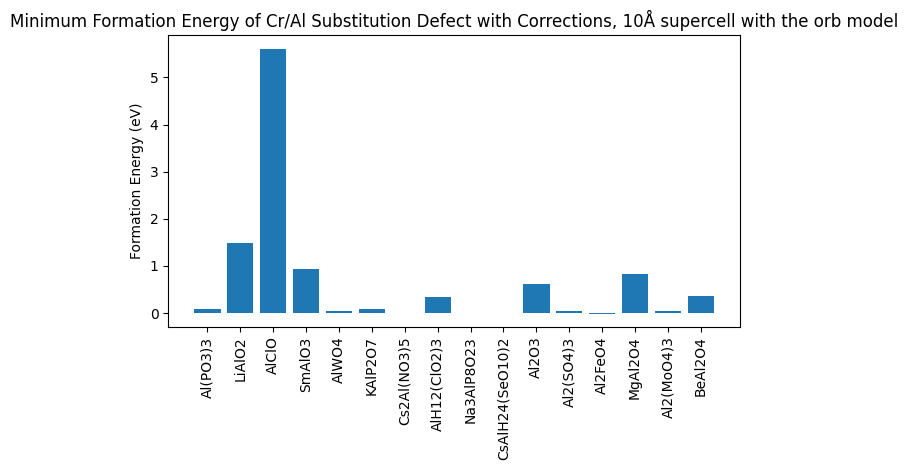

In [19]:
fig, ax = plt.subplots()
bars = ax.bar(compounds, mfe)  # Assuming you have these lists already

# Add labels on top of each bar
ax.set_title(f"Minimum Formation Energy of Cr/Al Substitution Defect with Corrections, {supercell_size}Å supercell with the {MODEL} model")
ax.set_ylabel("Formation Energy (eV)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig(f"../figures/{MODEL}_corrections_min_defect_formation_energies_{supercell_size}A.png", dpi=300, bbox_inches='tight')
plt.show()

In [20]:
print(mfe)

[0.07700238281256588, 1.4941579296875602, 5.609338789062486, 0.9257679882811871, 0.04487345703127765, 0.08058839843745069, 0.000759365234388909, 0.34689637695307773, 0.011132968750045436, 0.007521894531201667, 0.6263008789062852, 0.04030482421874737, -0.010260976562538104, 0.8329216015624219, 0.04978205078120368, 0.35486171874996586]


In [12]:
#plot of min that includes negatives
mfe_2 = []
compounds_2 = []
for key, val in complete_energies.items():
    if val['competing phases']['unstable'] == False:
        compounds_2.append(val['formula'])
        min_key = min(val['defect formation energy'], key=val['defect formation energy'].get)
        min_value = val['defect formation energy'][min_key]
        mfe_2.append(val['defect formation energy'][min_key])

KeyError: 'defect formation energy'

In [57]:
print(len(mfe), len(compounds_2))

17 14


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (7,) and arg 1 with shape (6,).

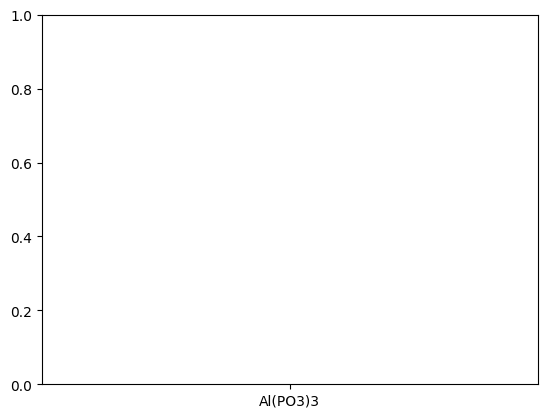

In [13]:
fig, ax = plt.subplots()
bars = ax.bar(compounds_2, mfe_2)  # Assuming you have these lists already

# Add labels on top of each bar
ax.set_title(f"Minimum Formation Energy of Cr/Al Substitution Defect with {Model} Model")
ax.set_ylabel("Formation Energy (eV)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig(f"../figures/{MODEL}_stable_min_defect_formation_energies_{supercell_size}A.png", dpi=300, bbox_inches='tight')
plt.show()

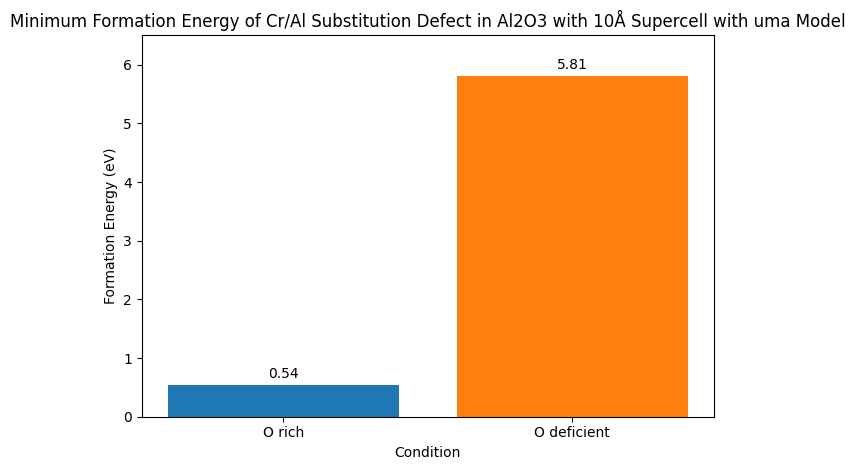

In [14]:
import matplotlib.pyplot as plt

# Data
conditions = ['O rich', 'O deficient']
formation_energies = [0.5400993289464999, 5.805219328946514]

# Set up the plot
fig, ax = plt.subplots()

# Plot bar chart
bars = ax.bar(conditions, formation_energies, color=['tab:blue', 'tab:orange'])

for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # vertical offset
                textcoords="offset points",
                ha='center', va='bottom')
# Formatting
ax.set_title(f"Minimum Formation Energy of Cr/Al Substitution Defect in Al2O3 with {supercell_size}Å Supercell with {MODEL} Model")
ax.set_ylabel("Formation Energy (eV)")
ax.set_xlabel("Condition")

plt.tight_layout()
plt.ylim(0,6.5)
# Save and show
plt.savefig(f"../figures/{MODEL}_Al2O3_defect_formation_energies_{supercell_size}A.png", dpi=300, bbox_inches='tight')
plt.show()
